Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 05

## Introduction

This week's sheet is supposed to last two weeks and thus should be solved and handed in before the end of **Sunday, May 22, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

### SciPy and scikit-learn

From now on you will sometimes need the python package [scikit-learn](https://pypi.python.org/pypi/scikit-learn) (scikit-learn) which depends on [scipy](https://pypi.python.org/pypi/scipy). To check if you already have running versions installed, run the following cell. If something is not found, try to follow the installation steps below. Otherwise just skip the following paragraphs and continue with the assignments.

In [1]:
import importlib
assert importlib.util.find_spec('scipy') is not None, 'scipy not found'
assert importlib.util.find_spec('sklearn') is not None, 'scikit-learn not found'

#### Unix

On Unix systems you can easily install the packages with `pip3 install scipy scikit-learn` from any terminal window. If it fails, try to figure out how to install a Fortran compiler for your OS or ask one of your fellow tutors for help.

#### Windows
On Windows it is a little bit more difficult to get a Fortran compiler (although [MinGW](http://www.mingw.org/) offers one it is still very difficult to get everything to run), so we recommend you to take the [precompiled binaries](http://www.lfd.uci.edu/~gohlke/pythonlibs/#scipy) of Christoph Gohlke for scipy. If you previously installed a 32bit version of Python download `scipy-0.17.0-cp35-none-win32.whl`, if you have a 64bit version please resort to `scipy-0.17.0-cp35-none-win_amd64.whl`. If you are unsure which version you run, run the following cell to figure it out:

In [2]:
import platform
print('You are running a {} ({}) version.'.format(*platform.architecture()))

You are running a 64bit (WindowsPE) version.


To install the binaries open your command line, navigate to your folder where you downloaded the `*.whl` file to (`cd FOLDER`) and run `pip install scipy-0.17.0-cp35-none-win32.whl` (or `pip install scipy-0.17.0-cp35-none-win_amd64.whl` if you downloaded the 64 bit version).

There might be a problem with your `numpy` version - `scipy` needs the Intel Math Kernel Library which is not easily compiled manually.
If you run into troubles, uninstall `numpy` with `pip uninstall numpy` and download the `*.whl` files from [Gohlke's website](http://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy) again. Proceed as you did with scipy.

In case of any other problems, get in touch with your tutors!

## Assignment 1: Curse of Dimensionality [X Points]

**For the following exercise, be detailed in your answers, give examples and incorporate the following concepts/keywords:
random vectors in high dimensional space, Bertillonage, manifold**

What are the curse of dimensionality and its implication for pattern classification? 

*Curse of dimensionality describes the phenomenon that in high dimensional vector spaces, two randomly drawn vectors will almost always be close to orthogonal to each other. This is a real problem in data mining problems, where for a higher number of features, the number of possible combinations and therefore the volume of the resulting feature space exponentionally increases. 
In such a high dimensional space, data vectors from real data sets lie far away from each other (which means dense sampling becomes impossible, as there aren't enough samples close to each other). This also leads to the problem that pairs of data vectors have a high probability of having similar distances and to be close to orthogonal to each other. The result is that clustering becomes really difficult, as the vectors more or less stand on their own and distance measures cannot be applied easily.*


Explain how the phenomenom above could be use to one's advantage.

*This is actually an advantage if you want to discriminate between a high number of individuals (see Bertillonage, where using only 11 features results in a feature space big enough to discriminate humans), but if you want to get usable information out of data, such a 'singling out' of samples is a great disadvantage.*


What are types of dimensionality that can be used to describe data?

*Intrinsic dimensionality exists in contrast to the descriptive dimensionality of data, which is defined by the numbers of parameters used to produce or represent the raw data (i.e. the number of pixels in an unprocessed image).*

*Additionally to this representive dimensionality, there is also a (most of the time smaller) number of independent parameters which is necessary to describe the data, always in regard to a specific problem we want to use the data on. 
For example: a data set might consist of a number of portraits, all with size 1920x1080 pixels, which constitutes their descriptive dimensionality. To do some facial recognition on these portraits however, we do not need the complete descriptive dimension space (which would be waaaay too big anyway), but only a few independent parameters (which we can get by doing PCA and looking at the eigenfaces). 
This is possible because the data never fill out the entire high dimensional vector space but instead concentrate along a manifold of a much lower dimensionality.*

## Assignment 2: Implement and apply PCA [X Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset. This dataset consists of measurements taken on 97 different cars. The 11 features measured are : Suggested retail price (US\$), Price to dealer (US\$), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage , Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Load the cars dataset
cars=np.loadtxt('cars.csv',delimiter=',')

As a first step we need to normalize the data (why is that so?). Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [6]:
# TODO : Normalize the data and store it in cars_norm
cars_norm = (cars-np.mean(cars , axis = 0))/(np.std(cars , axis = 0))

assert np.sum(cars_norm) < 1e-10
assert np.sum(cars_norm**2)/cars_norm.size == 1

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues (you probably have to use pre-implemented funtions for this).When the data is normalized the autocovariance is calculated as
$$C = X\cdot X^T$$
The entry $c_{i,j}$ in C tells you how much feature i correlates with feature j. 

In [7]:
# TODO : Compute the autocovariance matrix and store it into autocovar
# TODO : Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec

autocovar = np.dot(np.transpose(cars_norm) , cars_norm)
eigenval, eigenvec = np.linalg.eig(autocovar)

assert autocovar.shape == (11,11)
assert eigenval.shape == (11,)
assert eigenvec.shape == (11,11)
assert eigenval[0] > eigenval[1] > eigenval[2]

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down into the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as 11 two dimensional plots to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot?

<IPython.core.display.Javascript object>


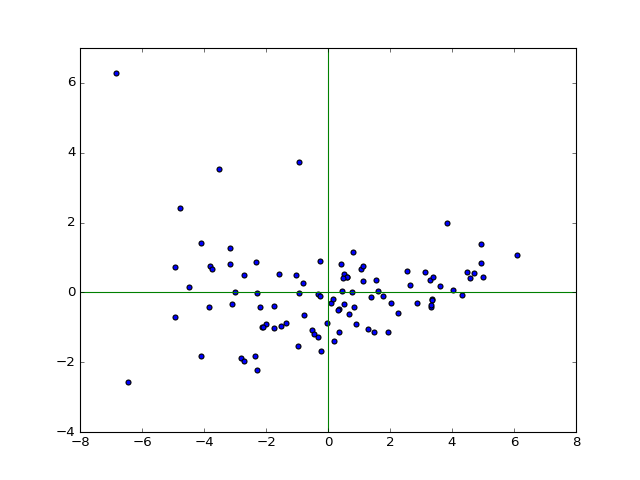

<IPython.core.display.Javascript object>


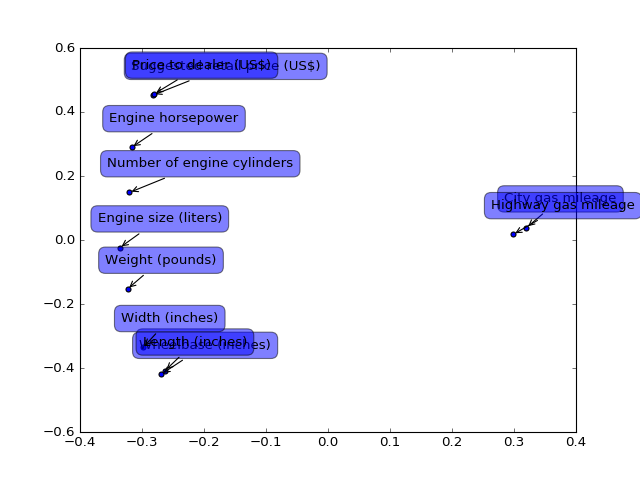

In [8]:
#project the data down into the two dimensional subspace
proj = np.dot(cars_norm , eigenvec[:,0:2])

# fancy plotting
figure, axis = plt.subplots(1)
plt.scatter(proj[:,0],proj[:,1])
# divide plot into quadrants
plt.plot(np.linspace(-8,8,100),np.tile(0 ,100),color='green')
plt.plot(np.tile(0 ,100),np.linspace(-4,7,100),color='green')

axis.set_xlim(-8, 8)
axis.set_ylim(-4, 7)

# more fancy plotting
figure, axis = plt.subplots(1)
plt.scatter(eigenvec[:,0],eigenvec[:,1])
# add labels
labels = ['Suggested retail price (US\$)', 'Price to dealer (US\$)', 'Engine size (liters)', 'Number of engine cylinders', 'Engine horsepower', 'City gas mileage' , 'Highway gas mileage', 'Weight (pounds)', 'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Answer:
The first plot shows the complete dataset projected down onto the two first principle components. Only few points overlap and the points are generally spread out well in the subspace. There is not much trend in the plot which is what we desired, i.e. the axis are not redundant. No clusters can be recognized. It is admissible to pick a subspace of dimension two since the eigenvectors have negligible magnitude starting at the third eigenvector. PCA is a good method for this dataset.

The second plot shows where a car that has a unit vector as a feature vector would be projected into the subspace. Two custers are recognizable - the gas milage and the other features. This allows us to interpret the first graph better. Cars that are far on the right must have a high gas mileage, either in the city, on the highway or both. They do not have high values on the other categories though. Cars that are high up in the plot are expensive and have high horse power but are rather small and don't weigh much.

The quadrants might correspond to: Sports car (top left), family car (bottom left) and limousine (right).

## Assignment 3: Whitening and Reconstruction of Data [X Points]

## Assignment 4: Eigenleaves [X Points]

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import math
import time

def process_images():
    goal = 200
    BASE = 'leafsnap/'
    TRAIN = 'train/'
    TEST = 'test/'

    def normalizeimage(in_img, out_img, goalsize):
        im = Image.open(in_img).convert('LA')
        w, h = im.size
        if w == max(w,h):
            cropbox = (math.ceil((w-h)/2), 0, w-math.floor((w-h)/2), h)
        else:
            cropbox = (0, math.ceil((h-w)/2), w, h-math.floor((h-w)/2))
        cropped = im.crop(cropbox)
        cropped.thumbnail((goalsize, goalsize))
        cropped.save(out_img)
        return cropped.size

    processed = {
        'lab': {},
        'field': {}
    }
    start = time.time()
    with open(BASE + 'leafsnap-dataset-images.txt', 'r') as f:
        next(f)
        count_train = 0
        count_test = 0
        last_train = None
        last_test = None
        i = 0
        for line in f:
            path = line.split('\t')[1]
            l = path.split('/')
            t = l[2]
            s = l[3]
            try:
                if processed[t][s] < (4 if t == 'lab' else 2):
                    processed[t][s] += 1
                else:
                    continue
            except KeyError:
                processed[t][s] = 1
            out = "{}{}{}_{}.png".format(BASE, TRAIN if t == 'lab' else TEST, s, processed[t][s])
            size = normalizeimage(BASE + path, out, goal)
            i+=1
    print(i, time.time() - start)

1108 33.91545009613037


In [116]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import os
import string

TRAIN = os.path.join('leafsnap', 'train')
TEST = os.path.join('leafsnap', 'test')

def get_sample_paths(dirpath):
    return [os.path.join(dirpath, f) for f in os.listdir(dirpath) if os.path.isfile(os.path.join(dirpath, f))]


def read_sample(filepath):
    return mpimg.imread(filepath)[:,:,0]


def get_sample_name_from_key(key):
    return " ".join(key.split("_")[0:2]).capitalize()


def get_sample_database(path):
    files = get_sample_paths(path)
    database = {}
    for file in files[0:6]:
        key = file.split(os.path.sep)[-1][:-4]
        name = get_sample_name_from_key(key)
        data = read_sample(file)
        database[key] = {'name': name, 'data': data}
    return database


train_database = get_sample_database(TRAIN)

a = [data['data'].flatten() for data in train_database.values()]
a = np.stack(tuple(a))
print(a)

print(train_database['abies_concolor_1']['data'].flatten())

[[ 0.84705883  0.84705883  0.84705883 ...,  0.65490198  0.65098041
   0.64705884]
 [ 1.          1.          1.         ...,  0.11372549  0.11372549
   0.11372549]
 [ 1.          1.          1.         ...,  0.12156863  0.12156863
   0.12156863]
 [ 0.85882354  0.85882354  0.85882354 ...,  0.65882355  0.65098041
   0.65098041]
 [ 0.79215688  0.79215688  0.79215688 ...,  0.68235296  0.68627453
   0.68627453]
 [ 0.81568629  0.81568629  0.81568629 ...,  0.63137257  0.63921571
   0.64705884]]
[ 0.84705883  0.84705883  0.84705883 ...,  0.65490198  0.65098041
  0.64705884]


## Assignment 5: Theory [X Points]